### Problem 1: Linear Regression
### Problem Statement:
### You are hired by a company Gem Stones co ltd, which is a cubic zirconia manufacturer. You are provided with the dataset containing the prices and other attributes of almost 27,000 cubic zirconia (which is an inexpensive diamond alternative with many of the same qualities as a diamond). The company is earning different profits on different prize slots. You have to help the company in predicting the price for the stone on the bases of the details given in the dataset so it can distinguish between higher profitable stones and lower profitable stones so as to have better profit share. Also, provide them with the best 5 attributes that are most important.
### Data Dictionary:
1. Carat: Carat weight of the cubic zirconia.
2. Cut: Describe the cut quality of the cubic zirconia. Quality is increasing order Fair, Good, Very Good, Premium, Ideal.
3. Color: Colour of the cubic zirconia.With D being the best and J the worst.
4. Clarity: cubic zirconia Clarity refers to the absence of the Inclusions and Blemishes. (In order from Best to Worst, FL = flawless, l1= level 1 inclusion) IF, VVS1, VVS2, VS1, VS2, Sl1, Sl2, l1
5. Depth: The Height of cubic zirconia, measured from the Culet to the table, divided by its average Girdle Diameter.
6. Table: The Width of the cubic zirconia's Table expressed as a Percentage of its Average Diameter.
7. Price: The Price of the cubic zirconia.
8. X: Length of the cubic zirconia in mm.
9. Y: Width of the cubic zirconia in mm.
10. Z: Height of the cubic zirconia in mm.

### Importing all the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import scale
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from warnings import filterwarnings
filterwarnings('ignore')

### Question 1.1 Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA). Perform Univariate and Bivariate Analysis.

### Loading Data in Data Frame.

In [2]:
df= pd.read_csv('cubic_zirconia.csv')

### Checking the head of the data

In [3]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


### Checking the tail of the data

In [4]:
df.tail()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
26962,26963,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,26964,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,26965,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,26966,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682
26966,26967,1.25,Premium,J,SI1,62.0,58.0,6.90,6.88,4.27,5166


### Checking shape of the data

In [5]:
df.shape

(26967, 11)

The data have total 26967 rows and 11 columns

### Checking data info

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


As we have 11 columns with 3 object, 6 float and 2 int data types in the data.

### Check for null values

In [7]:
df.isnull().sum()

Unnamed: 0      0
carat           0
cut             0
color           0
clarity         0
depth         697
table           0
x               0
y               0
z               0
price           0
dtype: int64

we have total of 697 null values in the Depth variable.

### Checking for duplicates

In [8]:
dups=df.duplicated()
print('Number of duplicate rows= %d' % (dups.sum()))
df[dups]

Number of duplicate rows= 0


,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price


No duplicate data found

### Getting unique values of all the categorical variables

In [9]:
print('cut',': ',df['cut'].nunique())
print(df['cut'].value_counts().sort_values())
print(' ')
print('color',':',df['color'].nunique())
print(df['color'].value_counts().sort_values())
print(' ')
print('clarity',':',df['clarity'].nunique())
print(df['clarity'].value_counts().sort_values())

cut :  5
Fair           781
Good          2441
Very Good     6030
Premium       6899
Ideal        10816
Name: cut, dtype: int64
 
color : 7
J    1443
I    2771
D    3344
H    4102
F    4729
E    4917
G    5661
Name: color, dtype: int64
 
clarity : 8
I1       365
IF       894
VVS1    1839
VVS2    2531
VS1     4093
SI2     4575
VS2     6099
SI1     6571
Name: clarity, dtype: int64


As we can see we  have all the unique values of all the categorical variables.

### Univariate analysis / Bivariate Analysis

### Data Description

In [10]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,26967,NaN,NaN,NaN,13484,7784.85,1,6742.5,13484,20225.5,26967
carat,26967,NaN,NaN,NaN,0.798375,0.477745,0.2,0.4,0.7,1.05,4.5
cut,26967,5,Ideal,10816,NaN,NaN,NaN,NaN,NaN,NaN,NaN
color,26967,7,G,5661,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clarity,26967,8,SI1,6571,NaN,NaN,NaN,NaN,NaN,NaN,NaN
depth,26270,NaN,NaN,NaN,61.7451,1.41286,50.8,61,61.8,62.5,73.6
table,26967,NaN,NaN,NaN,57.4561,2.23207,49,56,57,59,79
x,26967,NaN,NaN,NaN,5.72985,1.12852,0,4.71,5.69,6.55,10.23
y,26967,NaN,NaN,NaN,5.73357,1.16606,0,4.71,5.71,6.54,58.9
z,26967,NaN,NaN,NaN,3.53806,0.720624,0,2.9,3.52,4.04,31.8


Observation:
- Based on summary descriptive, the data looks good.
- we see most of the variable have mean/median nearly equal.

We have both categorical and continuous data, 

For categorical data we have cut, colour and clarity 

For continuous data we have carat, depth, table, x. y, z and price 

Price will be target variable.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


Variable 'Unnamed: 0' seems to be useless variable. 

In [12]:
#creating DataFrame of continuous variables only
num_df= df[['carat','depth','table','x','y','z','price']]
num_df.head()

,carat,depth,table,x,y,z,price
0,0.30,62.1,58.0,4.27,4.29,2.66,499
1,0.33,60.8,58.0,4.42,4.46,2.70,984
2,0.90,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,60.4,59.0,4.35,4.43,2.65,779


In [13]:
def univariateanalysis_numaric(column,nbins):
    print("Description of " + column)
    print('...........................................................')
    print(num_df[column].describe(),end=' ')
    print(' ')
    
    plt.figure()
    print("Distribution of " + column)
    print('...........................................................')
    sns.distplot(num_df[column],kde=False,color='g');
    plt.show()
    
    plt.figure()
    print("Boxplot of " + column)
    print('...........................................................')
    sns.boxplot(x=num_df[column])
    plt.show()

In [14]:
lstnumariccolumns= list(num_df.columns.values)
len(lstnumariccolumns)

7

Description of carat
...........................................................
count    26967.000000
mean         0.798375
std          0.477745
min          0.200000
25%          0.400000
50%          0.700000
75%          1.050000
max          4.500000
Name: carat, dtype: float64  
Distribution of carat
...........................................................


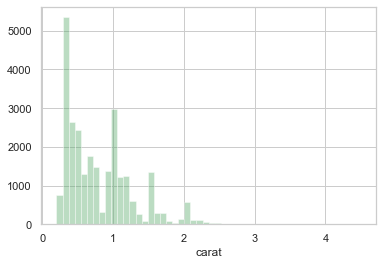

Boxplot of carat
...........................................................


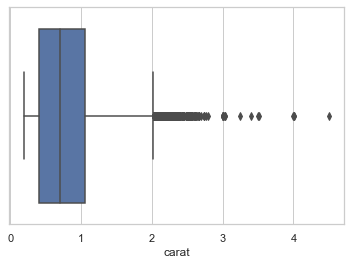

Description of depth
...........................................................
count    26270.000000
mean        61.745147
std          1.412860
min         50.800000
25%         61.000000
50%         61.800000
75%         62.500000
max         73.600000
Name: depth, dtype: float64  
Distribution of depth
...........................................................


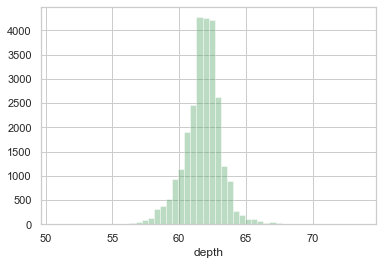

Boxplot of depth
...........................................................


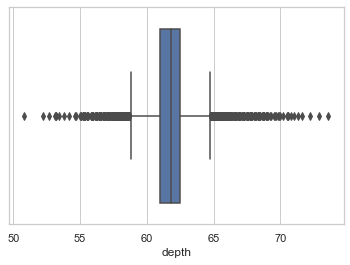

Description of table
...........................................................
count    26967.000000
mean        57.456080
std          2.232068
min         49.000000
25%         56.000000
50%         57.000000
75%         59.000000
max         79.000000
Name: table, dtype: float64  
Distribution of table
...........................................................


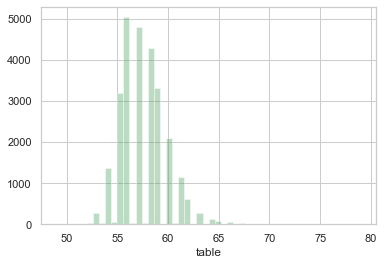

Boxplot of table
...........................................................


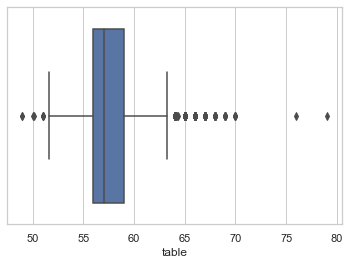

Description of x
...........................................................
count    26967.000000
mean         5.729854
std          1.128516
min          0.000000
25%          4.710000
50%          5.690000
75%          6.550000
max         10.230000
Name: x, dtype: float64  
Distribution of x
...........................................................


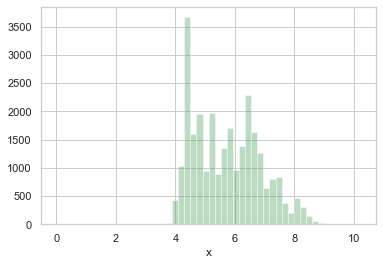

Boxplot of x
...........................................................


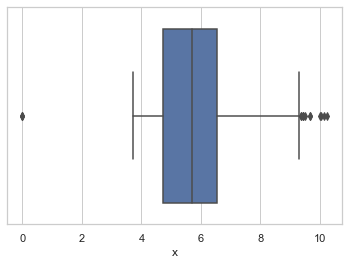

Description of y
...........................................................
count    26967.000000
mean         5.733569
std          1.166058
min          0.000000
25%          4.710000
50%          5.710000
75%          6.540000
max         58.900000
Name: y, dtype: float64  
Distribution of y
...........................................................


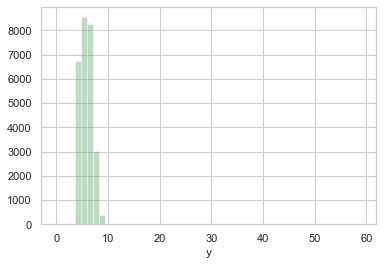

Boxplot of y
...........................................................


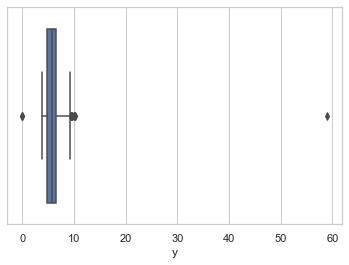

Description of z
...........................................................
count    26967.000000
mean         3.538057
std          0.720624
min          0.000000
25%          2.900000
50%          3.520000
75%          4.040000
max         31.800000
Name: z, dtype: float64  
Distribution of z
...........................................................


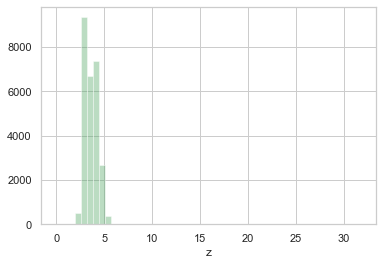

Boxplot of z
...........................................................


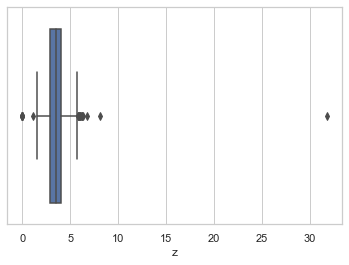

Description of price
...........................................................
count    26967.000000
mean      3939.518115
std       4024.864666
min        326.000000
25%        945.000000
50%       2375.000000
75%       5360.000000
max      18818.000000
Name: price, dtype: float64  
Distribution of price
...........................................................


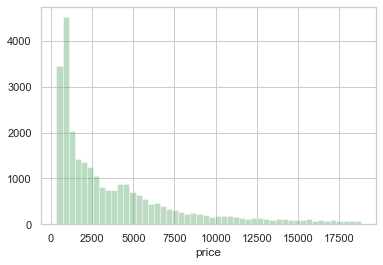

Boxplot of price
...........................................................


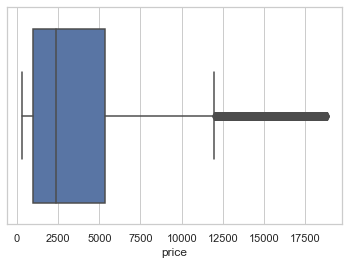

In [15]:
for x in lstnumariccolumns:
    univariateanalysis_numaric(x,20)

Observation:

#### Distribution of carat:

The distribution of data in carat seems to positively skewed, as there are multiple peaks points in the distribution there could multimode and the box plot of carat seems to have large number of outliers. In the range of 0 to 1 where majority of data lies.

#### Distribution of Depth:

The distribution of depth seems to be normal distribution, 

The depth ranges from 55 to 65.

The box plot of the depth distribution holds many outliers.

#### Distribution of table:

The distribution of table also seems to be positively skewed.

The box plot of table has outliers. 

The data distribution where there is maximum distribution is between 55 to 65.

#### Distribution of x:

The distribution of x (Length of the cubic zirconia in mm.) is positively skewed.

The box plot of the data consists of many outliers. 

The distribution rages from 4 to 8.

#### Distribution of y:

The distribution of Y (Width of the cubic zirconia in mm.) is positively skewed.

The box plot also consists of outliers.

The distribution too much positively skewed. The skewness may be due to the diamonds are always made in specific shape. There might not be too much sizes in the market.

#### Distribution of z:

The distribution of z (Height of the cubic zirconia in mm.) is positively skewed.

The box plot also consists of outliers.

The distribution too much positively skewed. The skewness may be due to the diamonds are always made in specific shape. There might not be too much sizes in the market.

#### Distribution of Price:

The price has seems to be positively skewed. The skew is positive.

The price has outliers in the data.

The price distribution is from rs 100 to 8000.

In [16]:
# Let's check the skewness values quantitatively
num_df.skew().sort_values(ascending=False)

y        3.850189
z        2.568257
price    1.618550
carat    1.116481
table    0.765758
x        0.387986
depth   -0.028618
dtype: float64

### Bivariate Analysis
### Categorical Variables
### CUT :

<AxesSubplot:xlabel='cut', ylabel='count'>

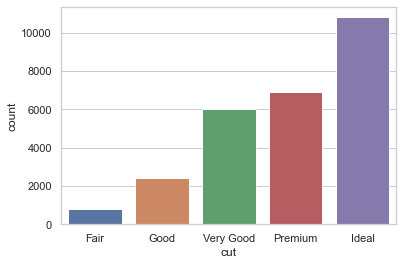

In [17]:
sns.countplot(df['cut'],order=['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'])

The most preferred cut seems to be ideal cut for diamonds.

<AxesSubplot:xlabel='cut', ylabel='price'>

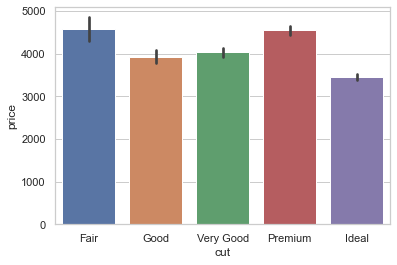

In [18]:
sns.barplot(data=df,x='cut',y='price',order=['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'])

The reason for the most preferred cut ideal is because those diamonds are priced lower than other cuts.

### COLOR:

<AxesSubplot:xlabel='color', ylabel='count'>

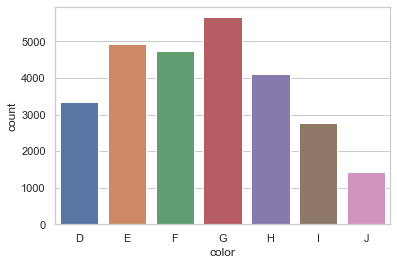

In [19]:
sns.countplot(df['color'],order=['D', 'E', 'F', 'G','H', 'I', 'J'])

We have 7 colours in the data, The G seems to be the preferred colour.

<AxesSubplot:xlabel='color', ylabel='price'>

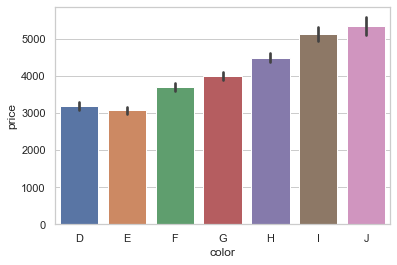

In [20]:
sns.barplot(data=df,x='color',y='price',order=['D', 'E', 'F', 'G','H', 'I', 'J'])

We see the G is priced in the middle of the seven colours, whereas J being the worst colour price seems too high.

### CLARITY:

<AxesSubplot:xlabel='clarity', ylabel='count'>

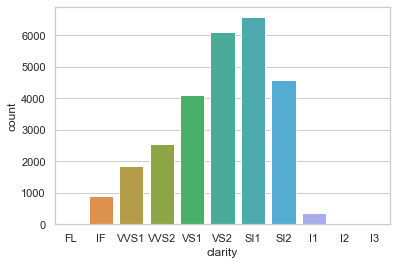

In [21]:
sns.countplot(df['clarity'],order = ['FL', 'IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1', 'I2', 'I3'])

The clarity VS2 seems to be preferred by people.

<AxesSubplot:xlabel='clarity', ylabel='price'>

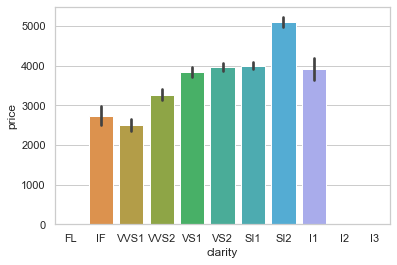

In [22]:
sns.barplot(data=df,x='clarity',y='price',order = ['FL', 'IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1', 'I2', 'I3'])

The data has No FL diamonds, from this we can clearly understand the flawless diamonds are not bringing any profits to the store.

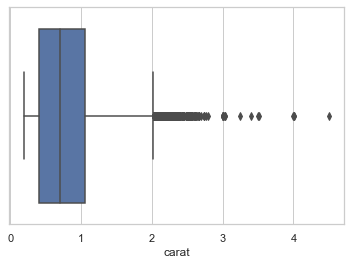

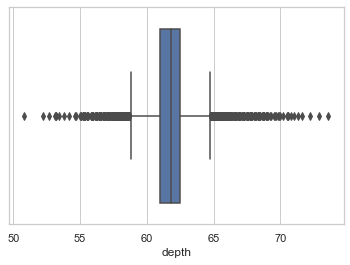

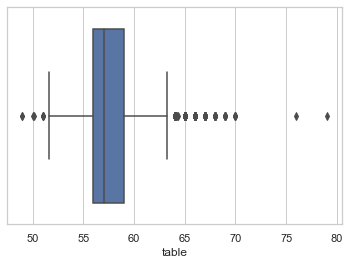

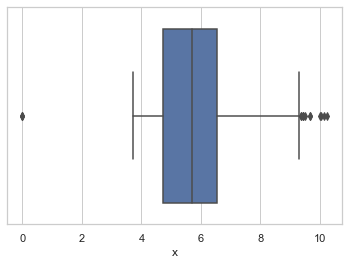

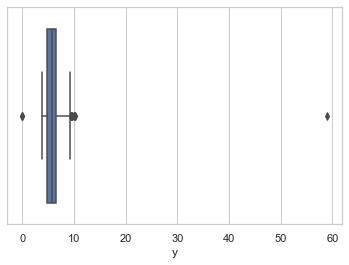

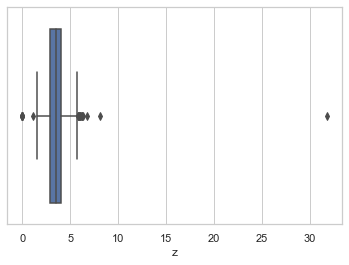

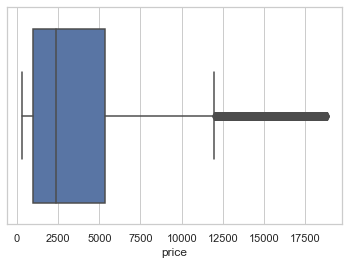

In [23]:
for i in num_df:
    sns.boxplot(num_df[i])
    plt.show()

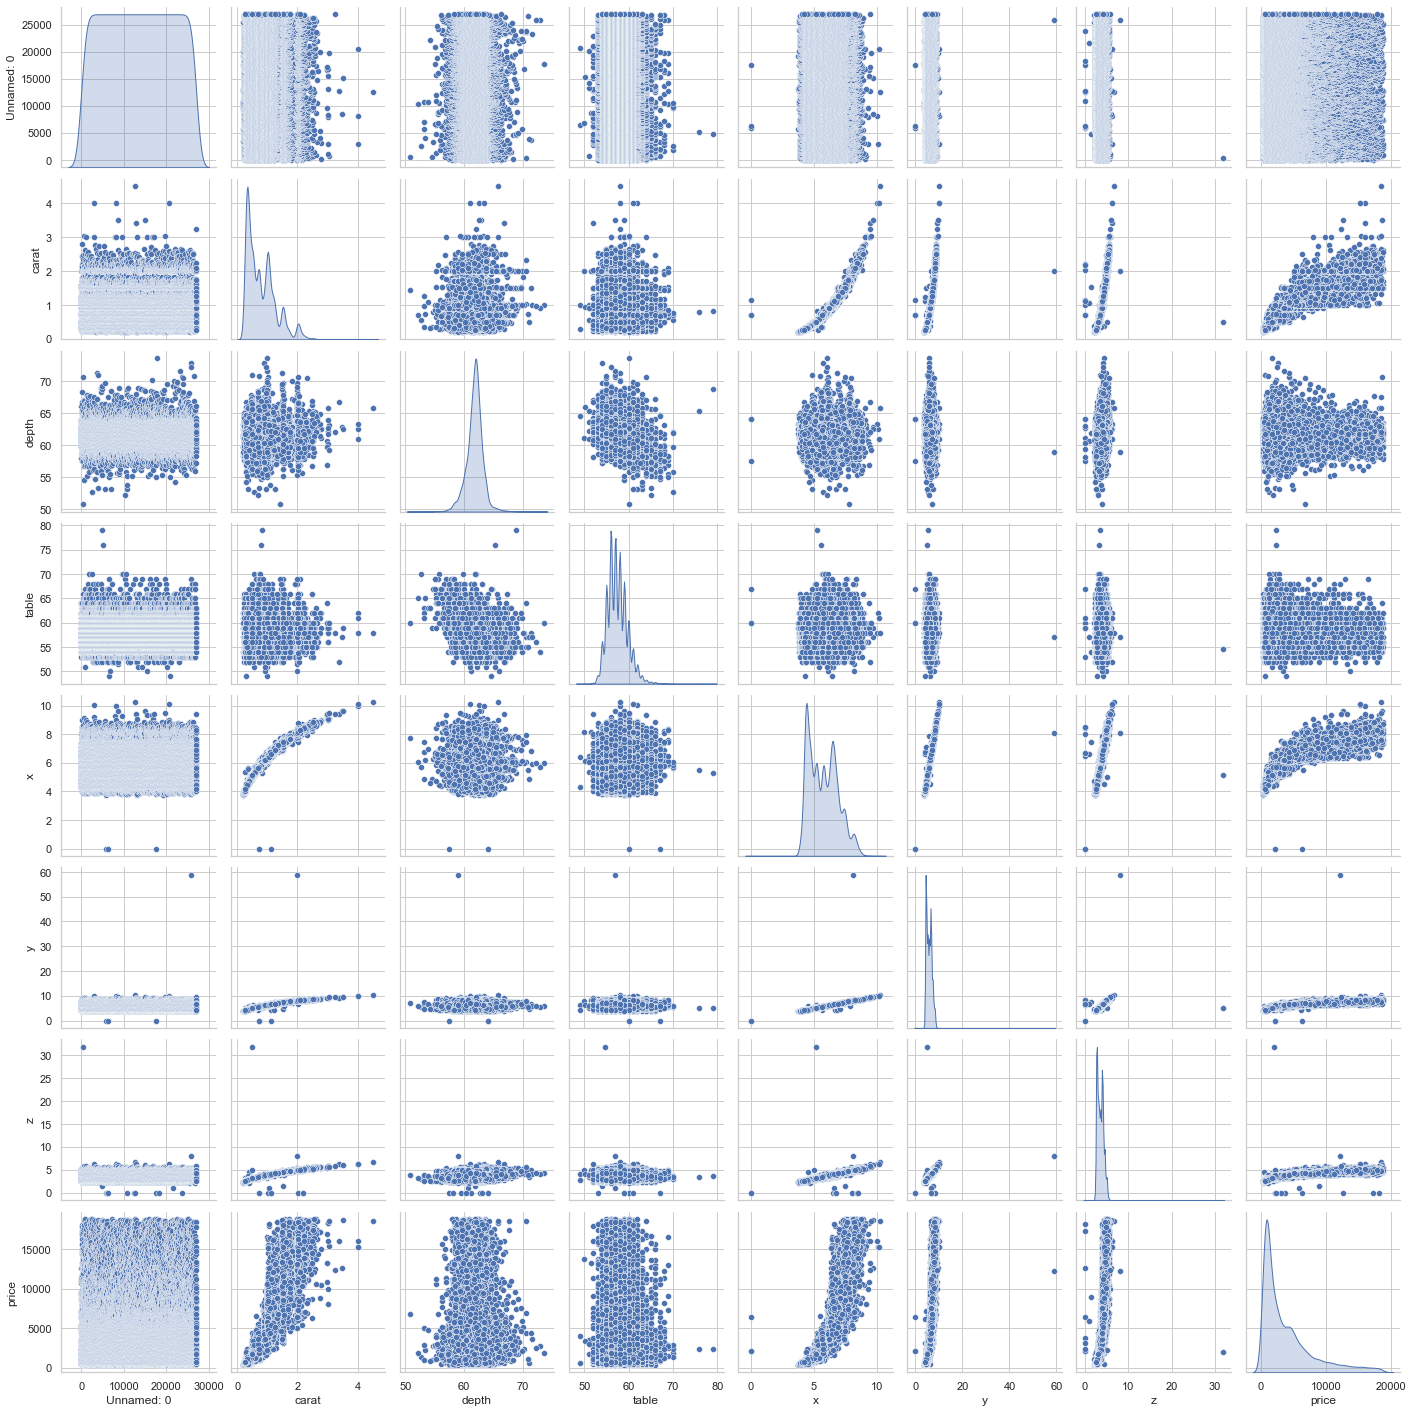

In [24]:
sns.pairplot(df, diag_kind='kde')  
plt.show()

###  Correlation Matrix

<AxesSubplot:>

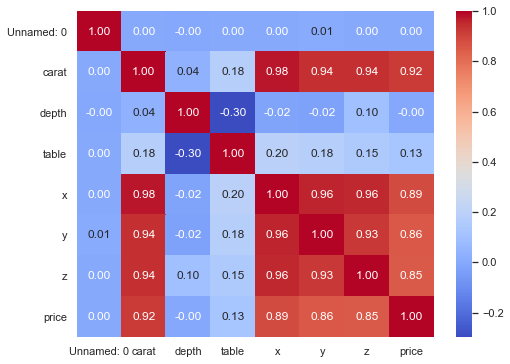

In [25]:
df_cor = df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(df_cor, annot=True, fmt = '.2f', cmap='coolwarm')

This matrix clearly shows the presence of multi collinearity in the dataset.

### Question 1.2 Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Do you think scaling is necessary in this case?

In [26]:
#Checking null values once again
df.isnull().sum()

Unnamed: 0      0
carat           0
cut             0
color           0
clarity         0
depth         697
table           0
x               0
y               0
z               0
price           0
dtype: int64

Yes we have Null values in depth, since depth being continuous variable mean or median imputation can be done. 

we can also drop null values if we want.

### Imputing null values with median

In [27]:
for column in df.columns:
    if df[column].dtype != 'object':
        median = df[column].median()
        df[column] = df[column].fillna(median)
        
df.isnull().sum()        

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
x             0
y             0
z             0
price         0
dtype: int64

After median imputation, we don’t have any null values in the dataset.

### Checking for values which are equal to zero

In [28]:
df[df.isin([0])].stack(0)

5821   x    0
       y    0
       z    0
6034   z    0
6215   x    0
       y    0
       z    0
10827  z    0
12498  z    0
12689  z    0
17506  x    0
       y    0
       z    0
18194  z    0
23758  z    0
dtype: object

variables x, y and z have values which are equal to zero.

In [29]:
df.loc[((df['x'] == 0) | (df['y'] == 0) | (df['z'] == 0))]

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
5821,5822,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
6034,6035,2.02,Premium,H,VS2,62.7,53.0,8.02,7.95,0.0,18207
6215,6216,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
10827,10828,2.20,Premium,H,SI1,61.2,59.0,8.42,8.37,0.0,17265
12498,12499,2.18,Premium,H,SI2,59.4,61.0,8.49,8.45,0.0,12631
12689,12690,1.10,Premium,G,SI2,63.0,59.0,6.50,6.47,0.0,3696
17506,17507,1.14,Fair,G,VS1,57.5,67.0,0.00,0.00,0.0,6381
18194,18195,1.01,Premium,H,I1,58.1,59.0,6.66,6.60,0.0,3167
23758,23759,1.12,Premium,G,I1,60.4,59.0,6.71,6.67,0.0,2383


We have certain rows having values zero, the x, y, z are the dimensions of a diamond so this can’t take into model. As there are very less rows.

We can drop these rows as don’t have any meaning in model building.
### Dropping rows having values zero

In [30]:
df.drop(df[((df['x'] == 0) | (df['y'] == 0) | (df['z'] == 0))].index, inplace=True)

In [31]:
df[df.isin([0])].stack(0)

Series([], dtype: object)

successfuly dropped the rows having values zero as don't have any meaning in model building.

### Scaling

Scaling is necessary 

Scaling can be useful to reduce or check the multi collinearity in the data.

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
sc= StandardScaler()
num_d= df.select_dtypes(exclude=['object'])
df[num_d.columns]= sc.fit_transform(num_d)

In [34]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,-1.731904,-1.043125,Ideal,E,SI1,0.253399,0.244112,-1.295920,-1.240065,-1.224865,-0.854851
1,-1.731776,-0.980310,Premium,G,IF,-0.679158,0.244112,-1.162787,-1.094057,-1.169142,-0.734303
2,-1.731647,0.213173,Very Good,E,VVS2,0.325134,1.140496,0.275049,0.331668,0.335404,0.584271
3,-1.731519,-0.791865,Ideal,F,VS1,-0.105277,-0.652273,-0.807766,-0.802041,-0.806936,-0.709945
4,-1.731390,-1.022187,Ideal,F,VVS1,-0.966099,0.692304,-1.224916,-1.119823,-1.238796,-0.785257


### Checking for Outliers after imputation of null values and before treating outliers.

In [35]:
df.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
x             0
y             0
z             0
price         0
dtype: int64

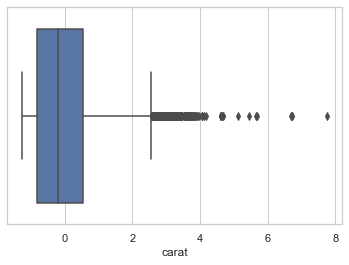

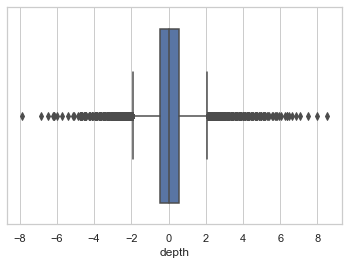

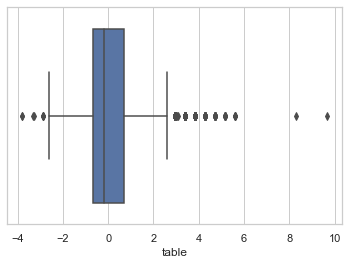

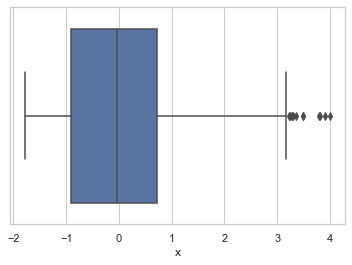

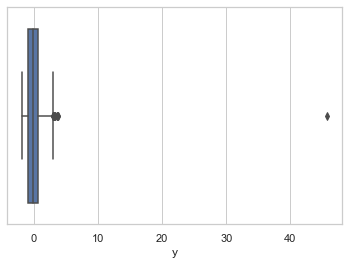

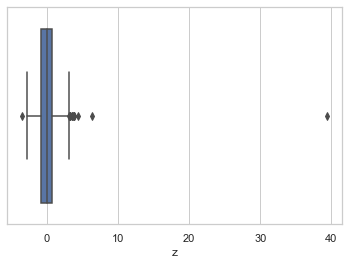

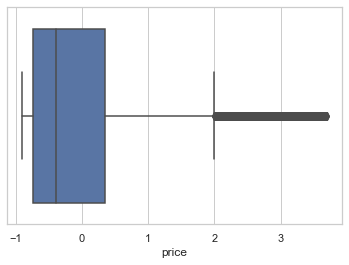

In [36]:
# constructing boxplot for each continuous variable 
cols= ['carat','depth','table','x','y','z','price']
for i in cols:
    sns.boxplot(df[i])
    plt.show()

### Removing Outliers

In [37]:
cont = df.dtypes[(df.dtypes!='uint8')&(df.dtypes!='object')].index
def remove_outlier(col):
    sorted(col)
    Q1,Q3= np.percentile(col,[25,75])
    IQR= Q3-Q1
    lower_range= Q1-(1.5*IQR)
    upper_range= Q3+(1.5*IQR)
    return lower_range, upper_range

In [38]:
for column in df[cont].columns:
    lr,ur= remove_outlier(df[column])
    df[column]= np.where(df[column]>ur,ur,df[column])
    df[column]= np.where(df[column]<lr,lr,df[column])

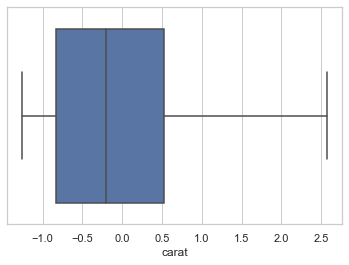

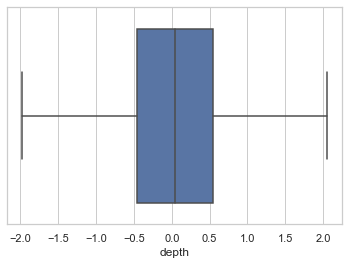

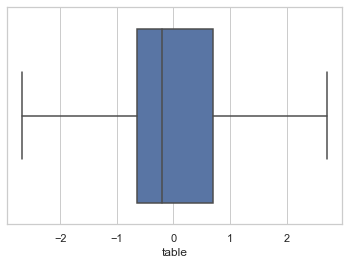

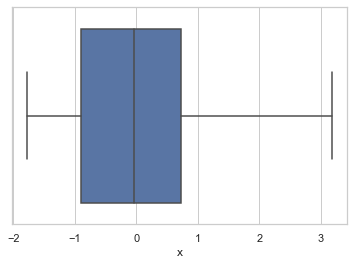

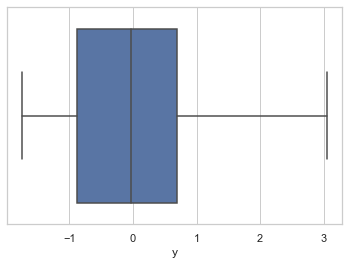

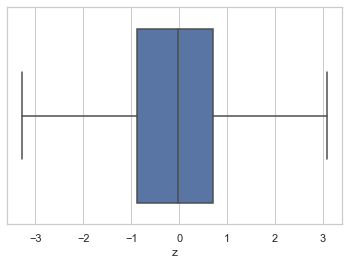

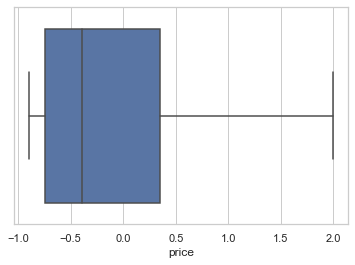

In [39]:
cols= ['carat','depth','table','x','y','z','price']
for i in cols:
    sns.boxplot(df[i])
    plt.show()

As we can see the ouliers are successfuly removed

### Question 1.3 Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Linear regression. Performance Metrics: Check the performance of Predictions on Train and Test sets using Rsquare, RMSE.
### Encoding String values

In [40]:
# Converting Categorical variables into Dummy variables in data
data= pd.get_dummies(df,columns=['cut','color','clarity'],drop_first=True)

In [41]:
data.head()

,Unnamed: 0,carat,depth,table,x,y,z,price,cut_Good,cut_Ideal,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,-1.731904,-1.043125,0.253399,0.244112,-1.295920,-1.240065,-1.224865,-0.854851,0,1,...,0,0,0,0,1,0,0,0,0,0
1,-1.731776,-0.980310,-0.679158,0.244112,-1.162787,-1.094057,-1.169142,-0.734303,0,0,...,0,0,0,1,0,0,0,0,0,0
2,-1.731647,0.213173,0.325134,1.140496,0.275049,0.331668,0.335404,0.584271,0,0,...,0,0,0,0,0,0,0,0,0,1
3,-1.731519,-0.791865,-0.105277,-0.652273,-0.807766,-0.802041,-0.806936,-0.709945,0,1,...,0,0,0,0,0,0,1,0,0,0
4,-1.731390,-1.022187,-0.966099,0.692304,-1.224916,-1.119823,-1.238796,-0.785257,0,1,...,0,0,0,0,0,0,0,0,1,0


In [42]:
data.columns

Index(['Unnamed: 0', 'carat', 'depth', 'table', 'x', 'y', 'z', 'price',
       'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_E',
       'color_F', 'color_G', 'color_H', 'color_I', 'color_J', 'clarity_IF',
       'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 'clarity_VS2',
       'clarity_VVS1', 'clarity_VVS2'],
      dtype='object')

Dummies have been encoded.


Linear regression model does not take categorical values so that we have encoded categorical values to integer for better results.

### Droping unwanted columns and doing Train / Test Split

In [43]:
# droping 'Unnamed:0' column as it is of no use in data set
data_mod= data.drop(columns=['Unnamed: 0'],axis=1)

In [44]:
data_mod.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price', 'cut_Good',
       'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_E', 'color_F',
       'color_G', 'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2'],
      dtype='object')

In [45]:
# Price is the target variable
X= data_mod.drop('price',axis=1)
y= data_mod[['price']]

In [46]:
X.head()

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,-1.043125,0.253399,0.244112,-1.295920,-1.240065,-1.224865,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,-0.980310,-0.679158,0.244112,-1.162787,-1.094057,-1.169142,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,0.213173,0.325134,1.140496,0.275049,0.331668,0.335404,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,-0.791865,-0.105277,-0.652273,-0.807766,-0.802041,-0.806936,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,-1.022187,-0.966099,0.692304,-1.224916,-1.119823,-1.238796,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


### Train / Test split

In [47]:
#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split


In [48]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

### Linear Regression Model

In [49]:
# invoke the Linear Regression function and find the bestfit model on training data

from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [50]:
# Let us explore the coefficients for each of the independent attributes

for idx,col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name,regression_model.coef_[0][idx]))

The coefficient for carat is 1.1009417847804501
The coefficient for depth is 0.005605143445570377
The coefficient for table is -0.013319500386804035
The coefficient for x is -0.30504349819633475
The coefficient for y is 0.30391448957926553
The coefficient for z is -0.13916571567987943
The coefficient for cut_Good is 0.09403402912977911
The coefficient for cut_Ideal is 0.1523107462056746
The coefficient for cut_Premium is 0.14852774839849378
The coefficient for cut_Very Good is 0.12583881878452705
The coefficient for color_E is -0.04705442233369822
The coefficient for color_F is -0.06268437439142825
The coefficient for color_G is -0.10072161838356786
The coefficient for color_H is -0.20767313311661612
The coefficient for color_I is -0.3239541927462737
The coefficient for color_J is -0.46858930275015803
The coefficient for clarity_IF is 0.9997691394634902
The coefficient for clarity_SI1 is 0.6389785818271332
The coefficient for clarity_SI2 is 0.42959662348315514
The coefficient for clari

In [51]:
# Let us check the intercept for the model

intercept= regression_model.intercept_[0]
print('The intercept for our model is {}'.format(intercept))

The intercept for our model is -0.7567627863049391


### R square on training data

In [52]:
regression_model.score(X_train,y_train)

0.9419557931252712

### R square on testing data

In [53]:
regression_model.score(X_test,y_test)

0.9381643998102491

### Checking RMSE Value on training and testing data

In [54]:
#RMSE on Training data
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

0.20690072466418796

In [55]:
#RMSE on Testing data
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

0.21647817772382869

In [56]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Checking for VIF values

In [57]:
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 

In [58]:
i=0
for column in X.columns:
    if i < 11:
        print (column ,"--->",  vif[i])
        i = i+1

carat ---> 33.35086119845924
depth ---> 4.573918951598579
table ---> 1.7728852812619
x ---> 463.5542785436457
y ---> 462.769821646584
z ---> 238.65819968687333
cut_Good ---> 3.6096181949437143
cut_Ideal ---> 14.34812508118844
cut_Premium ---> 8.623414379121153
cut_Very Good ---> 7.848451571723688
color_E ---> 2.371070464762613


We still find we have multi collinearity in the dataset, to drop these values to Lower level we can drop columns after doing stats model.

From stats model we can understand the features that do not contribute to the Model.

We can remove those features after that the Vif Values will be reduced.

Ideal value of VIF is less tha 5%.

### Linear Regression using stats models

In [59]:
data_train = pd.concat([X_train, y_train], axis=1)
data_train.head()

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,price
7598,-0.184654,1.114220,0.692304,-0.186479,-0.106356,-0.026801,0,0,0,1,...,0,0,0,0,0,1,0,0,0,-0.290884
8882,-1.043125,0.827280,0.244112,-1.295920,-1.222887,-1.169142,0,0,0,1,...,0,0,0,0,0,0,1,0,0,-0.843667
22763,-0.205593,1.544631,0.692304,-0.079973,-0.114944,0.070716,1,0,0,0,...,0,0,0,0,0,0,1,0,0,-0.394531
6643,-0.917495,-1.109569,-0.652273,-0.958650,-0.956637,-1.043763,0,1,0,0,...,0,0,0,0,0,0,1,0,0,-0.710442
18701,1.804485,0.899015,-0.204081,1.526498,1.516910,1.630986,0,0,0,1,...,1,0,0,1,0,0,0,0,0,1.233492


In [60]:
data_train.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'cut_Good', 'cut_Ideal',
       'cut_Premium', 'cut_Very Good', 'color_E', 'color_F', 'color_G',
       'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2', 'price'],
      dtype='object')

In [61]:
data_train.rename(columns = {'cut_Very Good' : 'cut_Very_Good'}, inplace = True)

In [62]:
data_train.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'cut_Good', 'cut_Ideal',
       'cut_Premium', 'cut_Very_Good', 'color_E', 'color_F', 'color_G',
       'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2', 'price'],
      dtype='object')

In [63]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'price ~ carat + depth + table + x+ y + z + cut_Good + cut_Ideal + cut_Premium + cut_Very_Good + color_E + color_F + color_G + color_H + color_I + color_J + clarity_IF + clarity_SI1 + clarity_SI2 + clarity_VS1 + clarity_VS2 + clarity_VVS1 + clarity_VVS2', data = data_train).fit()
lm1.params

Intercept       -0.756763
carat            1.100942
depth            0.005605
table           -0.013320
x               -0.305043
y                0.303914
z               -0.139166
cut_Good         0.094034
cut_Ideal        0.152311
cut_Premium      0.148528
cut_Very_Good    0.125839
color_E         -0.047054
color_F         -0.062684
color_G         -0.100722
color_H         -0.207673
color_I         -0.323954
color_J         -0.468589
clarity_IF       0.999769
clarity_SI1      0.638979
clarity_SI2      0.429597
clarity_VS1      0.838088
clarity_VS2      0.766024
clarity_VVS1     0.942077
clarity_VVS2     0.931367
dtype: float64

### BEST PARAMS SUMMARY

In [64]:
print(lm1.summary())  

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                 1.330e+04
Date:                Sun, 01 Aug 2021   Prob (F-statistic):               0.00
Time:                        21:59:20   Log-Likelihood:                 2954.6
No. Observations:               18870   AIC:                            -5861.
Df Residuals:                   18846   BIC:                            -5673.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.7568      0.016    -46.999

To ideally bring down the values to lower levels we can drop one of the variable that is highly correlated.

Dropping variables would bring down the multi collinearity level down.

In [65]:
# Calculate MSE 
mse = np.mean((regression_model.predict(X_test)-y_test)**2)

In [66]:
#Root Mean Squared Error - RMSE
import math
math.sqrt(mse)

0.21647817772382863

In [67]:
np.sqrt(lm1.mse_resid) #another way

0.20703242469322394

In [68]:
# Model Score
regression_model.score(X_test, y_test)

0.9381643998102491

In [69]:
y_pred = regression_model.predict(X_test)

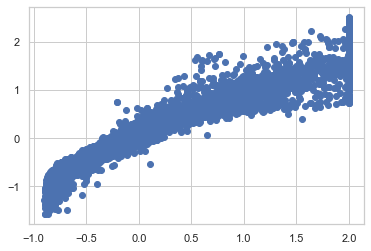

In [70]:
plt.scatter(y_test['price'], y_pred)
plt.show()

In [71]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(-0.76) * Intercept + (1.1) * carat + (0.01) * depth + (-0.01) * table + (-0.31) * x + (0.3) * y + (-0.14) * z + (0.09) * cut_Good + (0.15) * cut_Ideal + (0.15) * cut_Premium + (0.13) * cut_Very_Good + (-0.05) * color_E + (-0.06) * color_F + (-0.1) * color_G + (-0.21) * color_H + (-0.32) * color_I + (-0.47) * color_J + (1.0) * clarity_IF + (0.64) * clarity_SI1 + (0.43) * clarity_SI2 + (0.84) * clarity_VS1 + (0.77) * clarity_VS2 + (0.94) * clarity_VVS1 + (0.93) * clarity_VVS2 + 

### Question 1.4 Inference: Basis on these predictions, what are the business insights and recommendations.

We had a business problem to predict the price of the stone and provide insights for the 
company on the profits on different prize slots.

From the EDA analysis we could understand the cut, ideal cut had number profits to the company. The colours H, I, J have bought profits for the company.

In clarity if we could see there were no flawless stones and there were no profits coming from l1, l2, l3 stones. The ideal, premium and very good types of cut were bringing profits where as fair and good are not bringing profits.

The predictions were able to capture 95% variations in the price and it is explained by the predictors in the training set.

Using stats model if we cam run the model again we can have P values and coefficients which will give us better understanding of the relationship, so that values more 0.05 we can drop those variables and re run the model again for better results.

For better accuracy drop depth column in iteration for better results.

The equation,
#### (-0.76) * Intercept + (1.1) * carat + (-0.01) * table + (-0.32) * x + (0.28) * y + (-0.11) * z + (0.1) * cut_Good + (0.15) * cut_Ideal + (0.15) * cut_Premium + (0.13) * cut_Very_Good + (-0.05) * color_E + (-0.06) * color_F + (-0.1) * color_G + (-0.21) * color_H + (-0.32) * color_I + (-0.47) * color_J + (1.0) * clarity_IF + (0.64) * clarity_SI1 + (0.43) * clarity_SI2 + (0.84) * clarity_VS1 + (0.77) * clarity_VS2 + (0.94) * clarity_VVS1 + (0.93) * clarity_VVS2 + 

Recommendations 

1. The ideal, premium, very good cut types are the one which are bringing profits so that we could use marketing for these to bring in more profits.

2. The clarity of the diamond is the next important attributes the more the clear is the stone the profits are more

#### The best attributes are: 
Carat, 

Y the diameter of the stone,

clarity_IF,

clarity_SI1,

clarity_SI2,

clarity_VS1,

clarity_VS2,

clarity_VVS1,

clarity_VVS2

In [72]:
###

### Problem 2: Logistic Regression and LDA
### Problem Statement:
### You are hired by a tour and travel agency which deals in selling holiday packages. You are provided details of 872 employees of a company. Among these employees, some opted for the package and some didn't. You have to help the company in predicting whether an employee will opt for the package or not on the basis of the information given in the data set. Also, find out the important factors on the basis of which the company will focus on particular employees to sell their packages.

### Data Dictionary:
1. Holiday_Package: Opted for Holiday Package yes/no?
2. Salary: Employee salary
3. age: Age in years
4. edu: Years of formal education
5. no_young_children: The number of young children (younger than 7 years)
6. no_older_children: Number of older children
7. foreign: foreigner Yes/No

### Question 2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it. Perform Univariate and Bivariate Analysis. Do exploratory data analysis.

### Importing all the necessary libraries

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale
from warnings import filterwarnings
filterwarnings('ignore')

### Loading data in data frame

In [74]:
df_hp= pd.read_csv('Holiday_package.csv')

### Checking head of the data

In [75]:
df_hp.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


### Checking tail of the data

In [76]:
df_hp.tail()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
867,868,no,40030,24,4,2,1,yes
868,869,yes,32137,48,8,0,0,yes
869,870,no,25178,24,6,2,0,yes
870,871,yes,55958,41,10,0,1,yes
871,872,no,74659,51,10,0,0,yes


### Checking data info

In [77]:
df_hp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         872 non-null    int64 
 1   Holliday_Package   872 non-null    object
 2   Salary             872 non-null    int64 
 3   age                872 non-null    int64 
 4   educ               872 non-null    int64 
 5   no_young_children  872 non-null    int64 
 6   no_older_children  872 non-null    int64 
 7   foreign            872 non-null    object
dtypes: int64(6), object(2)
memory usage: 54.6+ KB


observation :

- 8 variables and 872 records.
- No missing record based on initial analysis.
- two object variables and six numaric variables.
- variable "Unnamed: 0" seems useless variable.

### Checking shape of the data

In [78]:
df_hp.shape

(872, 8)

The data have 872 rows and 8 columns

### Getting data Discription

In [79]:
# Data Description
df_hp.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,872.0,436.500000,251.869014,1.0,218.75,436.5,654.25,872.0
Salary,872.0,47729.172018,23418.668531,1322.0,35324.00,41903.5,53469.50,236961.0
age,872.0,39.955275,10.551675,20.0,32.00,39.0,48.00,62.0
educ,872.0,9.307339,3.036259,1.0,8.00,9.0,12.00,21.0
no_young_children,872.0,0.311927,0.612870,0.0,0.00,0.0,0.00,3.0
no_older_children,872.0,0.982798,1.086786,0.0,0.00,1.0,2.00,6.0


Observation:

- Based on summary descriptive, the data looks good.
- We see for most of the variable,mean/median are nearly equal.
- Std Deviation is high for Salary variable.

### Checking Null Values

In [80]:
df_hp.isnull().sum()

Unnamed: 0           0
Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

No null values found in the data.

### Checking for Duplicate Data

In [81]:
dups_hp= df_hp.duplicated()
print('Number of duplicate Rows = %d' % (dups_hp.sum()))
df_hp[dups_hp]

Number of duplicate Rows = 0


,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign


No duplicate data found

### Getting unique values of all the categorical variables

In [82]:
print('Holliday_Package',': ',df_hp['Holliday_Package'].nunique())
print(df_hp['Holliday_Package'].value_counts().sort_values())
print(' ')
print('foreign',':',df_hp['foreign'].nunique())
print(df_hp['foreign'].value_counts().sort_values())

Holliday_Package :  2
yes    401
no     471
Name: Holliday_Package, dtype: int64
 
foreign : 2
yes    216
no     656
Name: foreign, dtype: int64


Holliday_Package variable have two categories Yes/no with 401 yes and 471 no also variable foreign have two categories Yes/no with 216 yes and 656 no.

### Univariate / Bivariate Analysis

In [83]:
df_hp.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,872,NaN,NaN,NaN,436.5,251.869,1,218.75,436.5,654.25,872
Holliday_Package,872,2,no,471,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,872,NaN,NaN,NaN,47729.2,23418.7,1322,35324,41903.5,53469.5,236961
age,872,NaN,NaN,NaN,39.9553,10.5517,20,32,39,48,62
educ,872,NaN,NaN,NaN,9.30734,3.03626,1,8,9,12,21
no_young_children,872,NaN,NaN,NaN,0.311927,0.61287,0,0,0,0,3
no_older_children,872,NaN,NaN,NaN,0.982798,1.08679,0,0,1,2,6
foreign,872,2,no,656,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
df_hp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         872 non-null    int64 
 1   Holliday_Package   872 non-null    object
 2   Salary             872 non-null    int64 
 3   age                872 non-null    int64 
 4   educ               872 non-null    int64 
 5   no_young_children  872 non-null    int64 
 6   no_older_children  872 non-null    int64 
 7   foreign            872 non-null    object
dtypes: int64(6), object(2)
memory usage: 54.6+ KB


In [85]:
# Creating DataFrame of Continuous variables
num_df_hp= df_hp[['Salary','age','educ','no_young_children','no_older_children']]
num_df_hp.head()

,Salary,age,educ,no_young_children,no_older_children
0,48412,30,8,1,1
1,37207,45,8,0,1
2,58022,46,9,0,0
3,66503,31,11,2,0
4,66734,44,12,0,2


In [86]:
def univariateanalysis_numaric(column,nbins):
    print("Description of " + column)
    print('...........................................................')
    print(num_df_hp[column].describe(),end=' ')
    print(' ')
    
    plt.figure()
    print("Distribution of " + column)
    print('...........................................................')
    sns.distplot(num_df_hp[column],kde=False,color='g');
    plt.show()
    
    plt.figure()
    print("Boxplot of " + column)
    print('...........................................................')
    sns.boxplot(x=num_df_hp[column])
    plt.show()

In [87]:
lstnumariccolumns= list(num_df_hp.columns.values)
len(lstnumariccolumns)

5

Description of Salary
...........................................................
count       872.000000
mean      47729.172018
std       23418.668531
min        1322.000000
25%       35324.000000
50%       41903.500000
75%       53469.500000
max      236961.000000
Name: Salary, dtype: float64  
Distribution of Salary
...........................................................


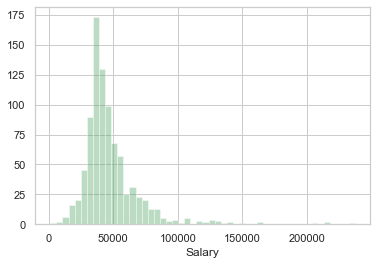

Boxplot of Salary
...........................................................


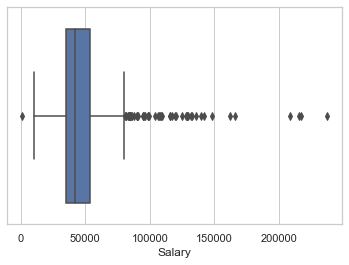

Description of age
...........................................................
count    872.000000
mean      39.955275
std       10.551675
min       20.000000
25%       32.000000
50%       39.000000
75%       48.000000
max       62.000000
Name: age, dtype: float64  
Distribution of age
...........................................................


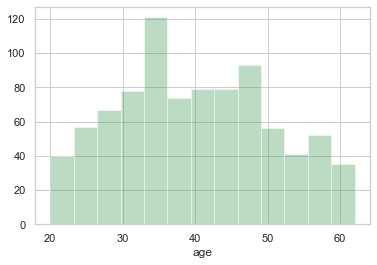

Boxplot of age
...........................................................


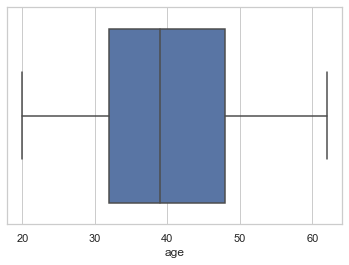

Description of educ
...........................................................
count    872.000000
mean       9.307339
std        3.036259
min        1.000000
25%        8.000000
50%        9.000000
75%       12.000000
max       21.000000
Name: educ, dtype: float64  
Distribution of educ
...........................................................


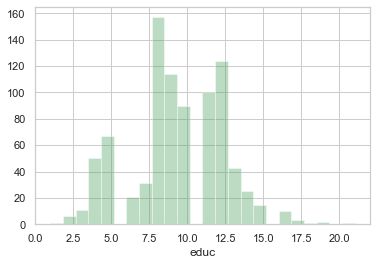

Boxplot of educ
...........................................................


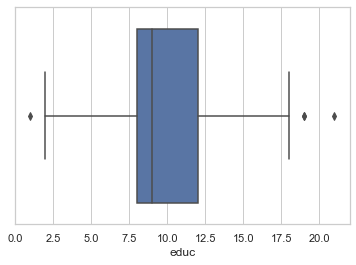

Description of no_young_children
...........................................................
count    872.000000
mean       0.311927
std        0.612870
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: no_young_children, dtype: float64  
Distribution of no_young_children
...........................................................


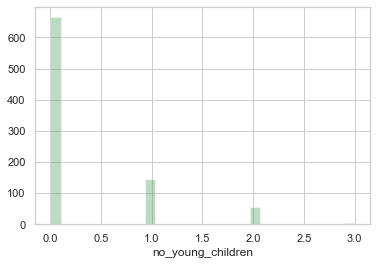

Boxplot of no_young_children
...........................................................


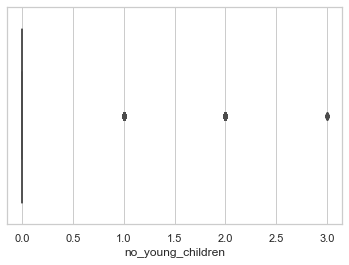

Description of no_older_children
...........................................................
count    872.000000
mean       0.982798
std        1.086786
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        6.000000
Name: no_older_children, dtype: float64  
Distribution of no_older_children
...........................................................


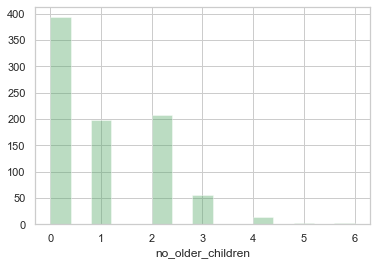

Boxplot of no_older_children
...........................................................


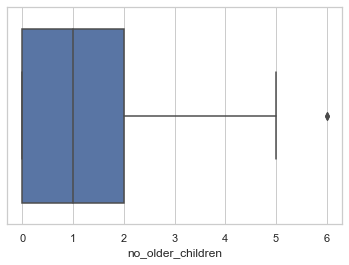

In [88]:
for x in lstnumariccolumns:
    univariateanalysis_numaric(x,20)

### Checking skewness

In [89]:
# Let's check the skewness values quantitatively
df_hp.skew().sort_values(ascending=False)

Salary               3.103216
no_young_children    1.946515
no_older_children    0.953951
age                  0.146412
Unnamed: 0           0.000000
educ                -0.045501
dtype: float64

### Bivariate Analysis
### Categorical Variable

<AxesSubplot:xlabel='Holliday_Package', ylabel='count'>

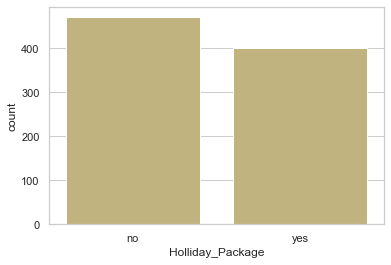

In [90]:
sns.countplot(x='Holliday_Package',data=df_hp,color='y')

<AxesSubplot:xlabel='foreign', ylabel='count'>

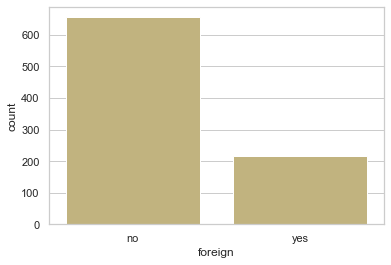

In [91]:
sns.countplot(x='foreign',data=df_hp,color="y")

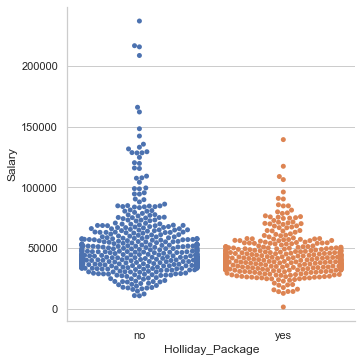

In [92]:
sns.catplot(x='Holliday_Package',y='Salary',kind='swarm',data=df_hp)

Observation:

We can see employees below salary 150000 have always opted for holiday package.

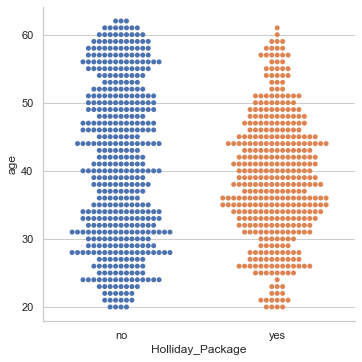

In [93]:
sns.catplot(x='Holliday_Package',y='age',kind='swarm',data=df_hp)

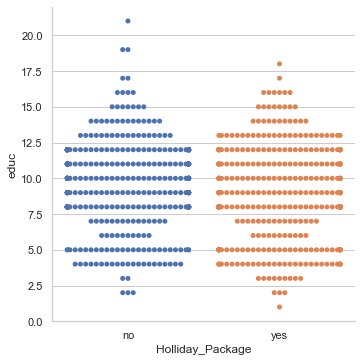

In [94]:
sns.catplot(x='Holliday_Package',y='educ',kind='swarm',data=df_hp)

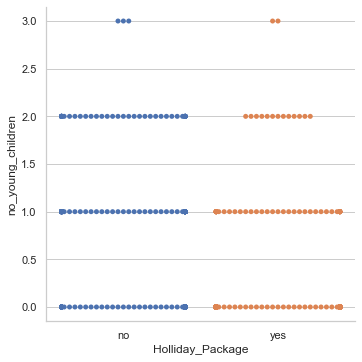

In [95]:
sns.catplot(x='Holliday_Package',y='no_young_children',kind='swarm',data=df_hp)

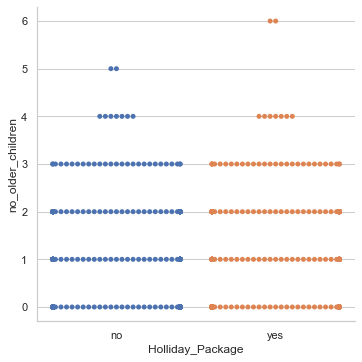

In [96]:
sns.catplot(x='Holliday_Package',y='no_older_children',kind='swarm',data=df_hp)

<AxesSubplot:xlabel='age', ylabel='Salary'>

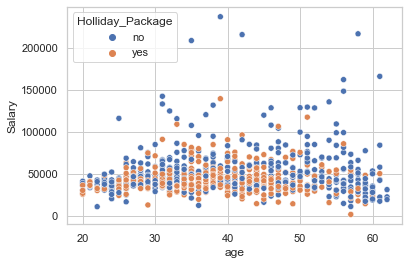

In [97]:
sns.scatterplot(x='age',y='Salary',hue='Holliday_Package',data=df_hp)

Obseravtion:

Employee age over 50 to 60 have seems to be not taking the holiday package, 
whereas in the age 30 to 50 and salary less than 50000 people have opted more for holiday package

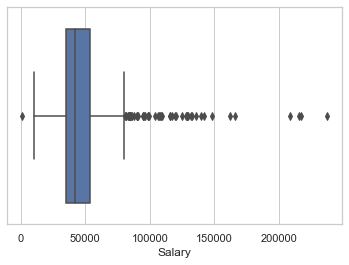

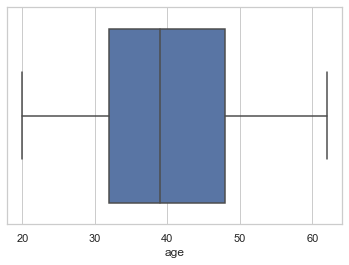

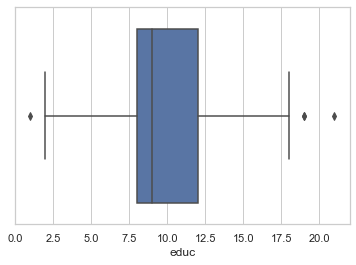

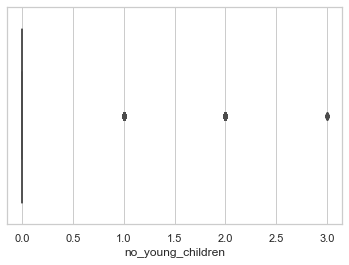

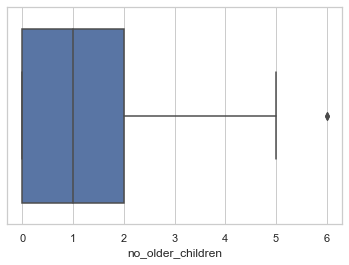

In [98]:
for i in num_df_hp:
    sns.boxplot(num_df_hp[i])
    plt.show()

Observation: 

We have detected outliers in some variables .

### Bivariate Analysis
### Data Distribution

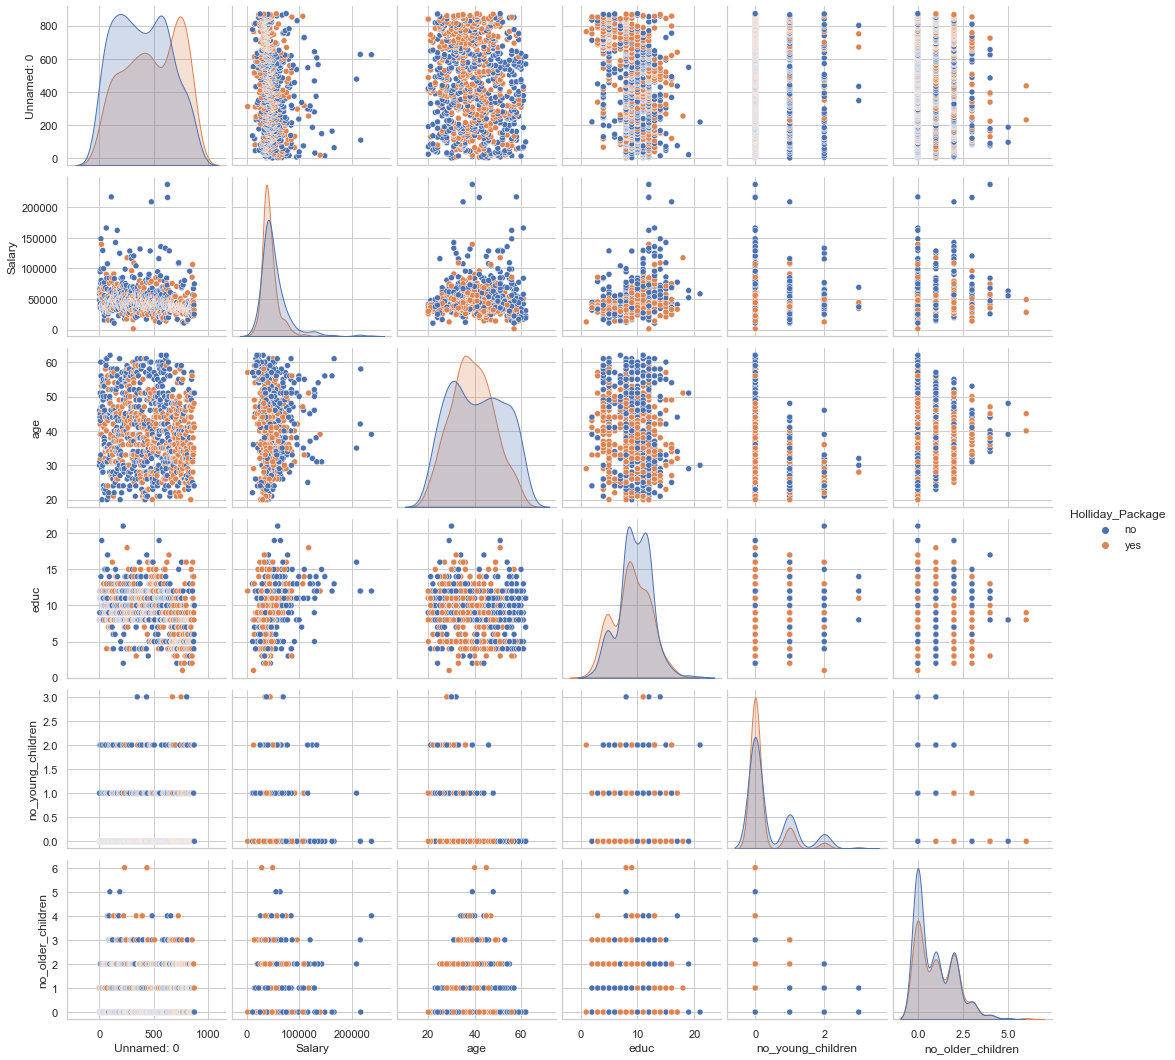

In [99]:
sns.pairplot(df_hp,diag_kind='kde',hue='Holliday_Package')

There is no correlation between the data, the data seems to be normal. 

There is no huge difference in the data distribution among the holiday package, I don’t see any clear two different distribution in the data

<AxesSubplot:>

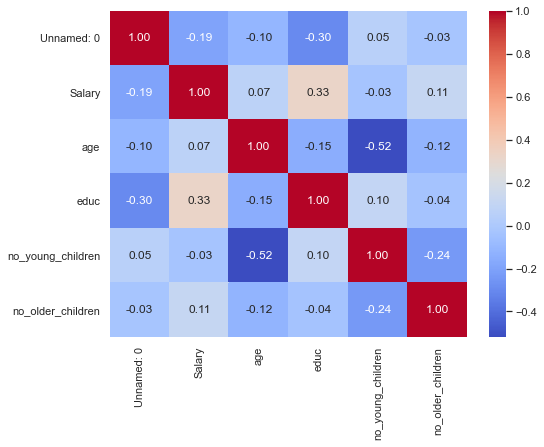

In [100]:
# Checking for correlations using heatmap
df_hp_cor=df_hp.corr()
plt.figure(figsize=(8,6))
sns.heatmap(df_hp_cor,annot=True,fmt='.2f',cmap='coolwarm')

#### No multi collinearity in the data

### Treating Outliers

we have outliers in the dataset, as LDA works based on numerical computation treating outliers will help perform the model better

In [101]:
cont1 = df_hp.dtypes[(df_hp.dtypes!='uint8')&(df_hp.dtypes!='object')].index
def remove_outlier(col):
    sorted(col)
    Q1,Q3= np.percentile(col,[25,75])
    IQR= Q3-Q1
    lower_range= Q1-(1.5*IQR)
    upper_range= Q3+(1.5*IQR)
    return lower_range, upper_range

In [102]:
for column in df_hp[cont1].columns:
    lr,ur=remove_outlier(df_hp[column])
    df_hp[column]=np.where(df_hp[column]>ur,ur,df_hp[column])
    df_hp[column]=np.where(df_hp[column]<lr,lr,df_hp[column])

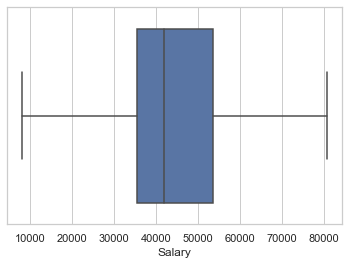

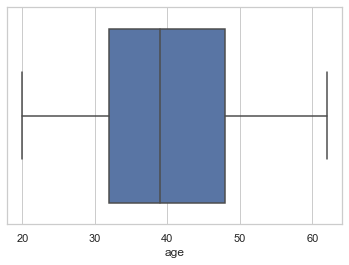

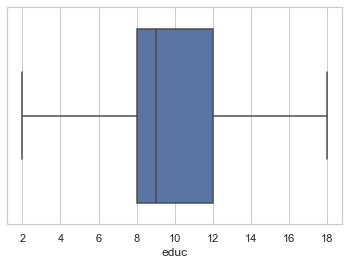

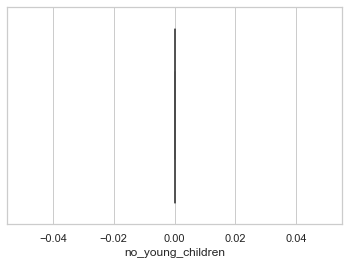

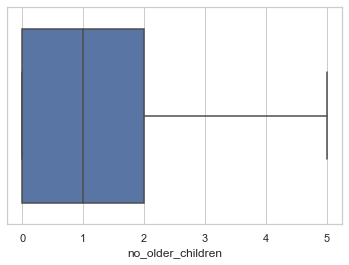

In [103]:
cols1= ["Salary",'age','educ','no_young_children','no_older_children']

for i in cols1:
    sns.boxplot(df_hp[i])
    plt.show()

Observation :

No outliers in the data, all the outliers have been treated.

In [104]:
df_hp.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1.0,no,48412.0,30.0,8.0,0.0,1.0,no
1,2.0,yes,37207.0,45.0,8.0,0.0,1.0,no
2,3.0,no,58022.0,46.0,9.0,0.0,0.0,no
3,4.0,no,66503.0,31.0,11.0,0.0,0.0,no
4,5.0,no,66734.0,44.0,12.0,0.0,2.0,no


In [105]:
# Droping the 'Unnamed: 0' column as it is useless for the model
df_hp1= df_hp.drop(columns=['Unnamed: 0'],axis=1)

In [106]:
df_hp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Holliday_Package   872 non-null    object 
 1   Salary             872 non-null    float64
 2   age                872 non-null    float64
 3   educ               872 non-null    float64
 4   no_young_children  872 non-null    float64
 5   no_older_children  872 non-null    float64
 6   foreign            872 non-null    object 
dtypes: float64(5), object(2)
memory usage: 47.8+ KB


as we can see column 'Unnamed: 0' is dropped successfuly

### Question 2.2 Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis).

In [107]:
# converting categorical variable in to dummy variable in data1

data1= pd.get_dummies(df_hp1,columns=['Holliday_Package','foreign'],drop_first=True)

In [108]:
data1.head()

,Salary,age,educ,no_young_children,no_older_children,Holliday_Package_yes,foreign_yes
0,48412.0,30.0,8.0,0.0,1.0,0,0
1,37207.0,45.0,8.0,0.0,1.0,1,0
2,58022.0,46.0,9.0,0.0,0.0,0,0
3,66503.0,31.0,11.0,0.0,0.0,0,0
4,66734.0,44.0,12.0,0.0,2.0,0,0


In [109]:
data1.columns

Index(['Salary', 'age', 'educ', 'no_young_children', 'no_older_children',
       'Holliday_Package_yes', 'foreign_yes'],
      dtype='object')

### Train / Test split

In [110]:
# copy all the predictor variables into x dataframe.
x= data1.drop('Holliday_Package_yes',axis=1)

# Copy target variable into Y dataframe.
Y= data1['Holliday_Package_yes']

In [111]:
# split x and Y into training and test set in 70:30 ratio
x_train,x_test,Y_train,Y_test= train_test_split(x,Y,test_size=0.30,random_state=1,stratify=Y)

In [112]:
Y_train.value_counts(1)

0    0.539344
1    0.460656
Name: Holliday_Package_yes, dtype: float64

In [113]:
####

In [114]:
# Fit the model on the data
model2 = LogisticRegression(solver= 'newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
model2.fit(x_train,Y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:   18.4s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

###  Prediction on training set

In [115]:
Y_train_predict = model2.predict(x_train)
Y_test_predict = model2.predict(x_test)

### Getting probabilties on test set

In [116]:
Y_test_predict_prob=model2.predict_proba(x_test)
pd.DataFrame(Y_test_predict_prob).head()

,0,1
0,0.640764,0.359236
1,0.569909,0.430091
2,0.655265,0.344735
3,0.564147,0.435853
4,0.538869,0.461131


In [117]:
Y_train_predict

array([1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

### Confusion Matrix on training data

[[260  69]
 [154 127]]
              precision    recall  f1-score   support

           0       0.63      0.79      0.70       329
           1       0.65      0.45      0.53       281

    accuracy                           0.63       610
   macro avg       0.64      0.62      0.62       610
weighted avg       0.64      0.63      0.62       610



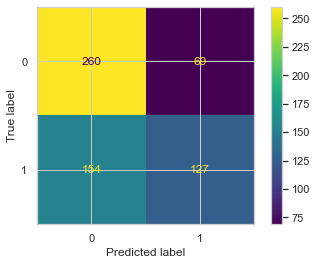

In [118]:
print(metrics.confusion_matrix(Y_train, Y_train_predict))
print(metrics.classification_report(Y_train, Y_train_predict))
plot_confusion_matrix(model2,x_train,Y_train)

### Confusion Matrix on testing data

[[118  24]
 [ 65  55]]
              precision    recall  f1-score   support

           0       0.64      0.83      0.73       142
           1       0.70      0.46      0.55       120

    accuracy                           0.66       262
   macro avg       0.67      0.64      0.64       262
weighted avg       0.67      0.66      0.65       262



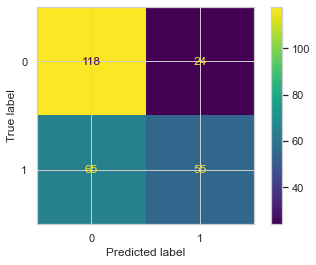

In [119]:
print(metrics.confusion_matrix(Y_test, Y_test_predict))
print(metrics.classification_report(Y_test, Y_test_predict))
plot_confusion_matrix(model2,x_test,Y_test)

### Accuracy - training data

In [120]:
lr_train_acc= model2.score(x_train,Y_train)
lr_train_acc

0.6344262295081967

### AUC and ROC for the training data

AUC: 0.661


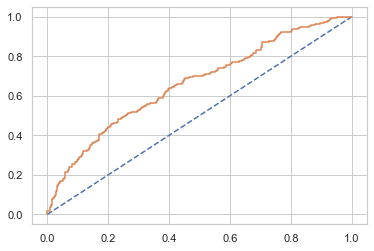

In [121]:
# Predict probabilities.
probs= model2.predict_proba(x_train)
# Keep probabilities for the positive outcome only
probs=probs[:,1]
# Calculate AUC.
lr_train_auc= roc_auc_score(Y_train,probs)
print('AUC: %.3f' % lr_train_auc)
# Calculate roc curve.
train_fpr, train_tpr, train_thresholds= roc_curve(Y_train,probs)
plt.plot([0,1],[0,1],linestyle='--')
# Plot the roc curve for the model.
plt.plot(train_fpr,train_tpr);

### Accuracy - test data

In [122]:
lr_test_acc= model2.score(x_test,Y_test)
lr_test_acc

0.6603053435114504

AUC: 0.675


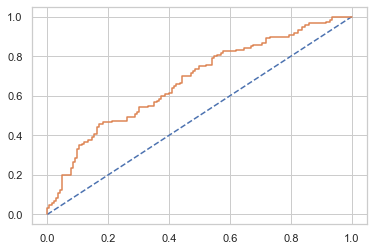

In [123]:
# Predict probabilities.
probs= model2.predict_proba(x_test)
# Keep probabilities for the positive outcome only
probs= probs[:,1]
# Calculate AUC.
lr_test_auc= roc_auc_score(Y_test,probs)
print('AUC: %.3f' % lr_test_auc)
# Calculate roc curve.
test_fpr, test_tpr, test_thresholds= roc_curve(Y_test,probs)
plt.plot([0,1],[0,1],linestyle='--')
# Plot the roc curve for the model.
plt.plot(test_fpr,test_tpr);

In [124]:
lr_metrics=classification_report(Y_train, Y_train_predict,output_dict=True)
df_lr=pd.DataFrame(lr_metrics).transpose()
lr_train_f1=round(df_lr.loc["1"][2],2)
lr_train_recall=round(df_lr.loc["1"][1],2)
lr_train_precision=round(df_lr.loc["1"][0],2)
print ('lr_train_precision ',lr_train_precision)
print ('lr_train_recall ',lr_train_recall)
print ('lr_train_f1 ',lr_train_f1)

lr_train_precision  0.65
lr_train_recall  0.45
lr_train_f1  0.53


In [125]:
lr_metrics=classification_report(Y_test, Y_test_predict,output_dict=True)
df_lr=pd.DataFrame(lr_metrics).transpose()
lr_test_f1=round(df_lr.loc["1"][2],2)
lr_test_recall=round(df_lr.loc["1"][1],2)
lr_test_precision=round(df_lr.loc["1"][0],2)
print ('lr_test_precision ',lr_test_precision)
print ('lr_test_recall ',lr_test_recall)
print ('lr_test_f1 ',lr_test_f1)

lr_test_precision  0.7
lr_test_recall  0.46
lr_test_f1  0.55


### LDA Model

In [126]:
# Coppying the original dataframe.
df_hp2= df_hp1.copy()

In [127]:
df_hp1.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412.0,30.0,8.0,0.0,1.0,no
1,yes,37207.0,45.0,8.0,0.0,1.0,no
2,no,58022.0,46.0,9.0,0.0,0.0,no
3,no,66503.0,31.0,11.0,0.0,0.0,no
4,no,66734.0,44.0,12.0,0.0,2.0,no


In [128]:
df_hp1.shape

(872, 7)

In [129]:
df_hp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Holliday_Package   872 non-null    object 
 1   Salary             872 non-null    float64
 2   age                872 non-null    float64
 3   educ               872 non-null    float64
 4   no_young_children  872 non-null    float64
 5   no_older_children  872 non-null    float64
 6   foreign            872 non-null    object 
dtypes: float64(5), object(2)
memory usage: 47.8+ KB


In [130]:
for feature in df_hp1.columns: 
    if df_hp1[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df_hp1[feature].unique()))
        print(pd.Categorical(df_hp1[feature].unique()).codes)
        df_hp1[feature] = pd.Categorical(df_hp1[feature]).codes



feature: Holliday_Package
['no', 'yes']
Categories (2, object): ['no', 'yes']
[0 1]


feature: foreign
['no', 'yes']
Categories (2, object): ['no', 'yes']
[0 1]


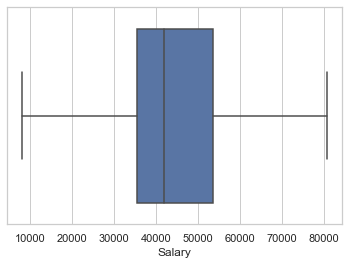

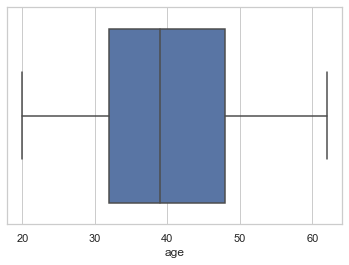

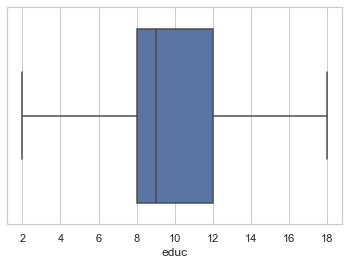

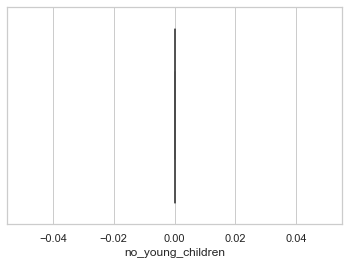

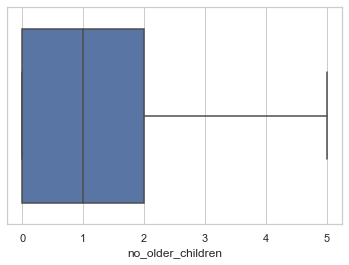

In [131]:
### Checking for outliers once again before proceeding
cols= ['Salary','age','educ','no_young_children','no_older_children']

for i in cols:
    sns.boxplot(df_hp1[i])
    plt.show()

In [132]:
X = df_hp1.drop('Holliday_Package',axis=1)
Y = df_hp1.pop('Holliday_Package')

In [133]:
X_train,X_test,Y_train,Y_test = model_selection.train_test_split(X,Y,test_size=0.30,random_state=1,stratify=Y)

In [134]:
Y_train.value_counts(1)

0    0.539344
1    0.460656
Name: Holliday_Package, dtype: float64

### Building LDA model

In [135]:
clf= LinearDiscriminantAnalysis()
model= clf.fit(X_train,Y_train)

### Training Data Class Prediction with a cut-off value of 0.5

In [136]:
pred_class_train = model.predict(X_train)

### Test Data Class Prediction with a cut-off value of 0.5

In [137]:
pred_class_test = model.predict(X_test)

In [138]:
pred_class_test

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int8)

### Training Data Probability Prediction

In [139]:
pred_prob_train = model.predict_proba(X_train)

### Test Data Probability Prediction

In [140]:
pred_prob_test = model.predict_proba(X_test)

### Checking train model Score

In [141]:
lda_train_acc = model.score(X_train,Y_train)
lda_train_acc

0.6327868852459017

In [142]:
# Creating Confusion Matrix
confusion_matrix(Y_train, pred_class_train)

array([[263,  66],
       [158, 123]], dtype=int64)

### Classification report train data

In [143]:
print(classification_report(Y_train, pred_class_train))

              precision    recall  f1-score   support

           0       0.62      0.80      0.70       329
           1       0.65      0.44      0.52       281

    accuracy                           0.63       610
   macro avg       0.64      0.62      0.61       610
weighted avg       0.64      0.63      0.62       610



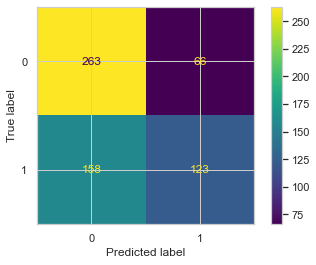

In [144]:
plot_confusion_matrix(model,X_train,Y_train)

### Checking test model Score

In [145]:
lda_test_acc = model.score(X_test,Y_test)
lda_test_acc

0.6564885496183206

In [146]:
# Creating Confusion matrix
confusion_matrix(Y_test, pred_class_test)

array([[118,  24],
       [ 66,  54]], dtype=int64)

### Classification report test data

In [147]:
print(classification_report(Y_test, pred_class_test))

              precision    recall  f1-score   support

           0       0.64      0.83      0.72       142
           1       0.69      0.45      0.55       120

    accuracy                           0.66       262
   macro avg       0.67      0.64      0.63       262
weighted avg       0.66      0.66      0.64       262



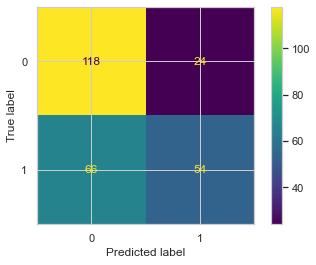

In [148]:
plot_confusion_matrix(model,X_test,Y_test)

### Changing the cutt off value to check optimal value that gives better Accuracy and F1 Score.

0.1 

Accuracy Score 0.4607
F1 Score 0.6308 

Confusion Matrix


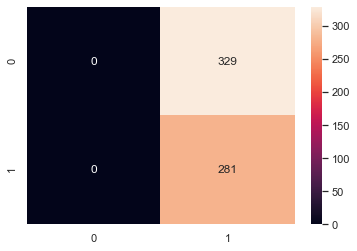

0.2 

Accuracy Score 0.4738
F1 Score 0.6365 

Confusion Matrix


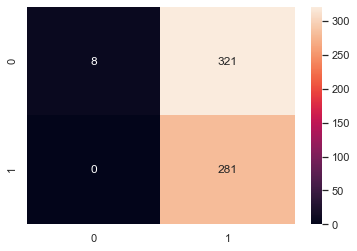

0.3 

Accuracy Score 0.5344
F1 Score 0.6485 

Confusion Matrix


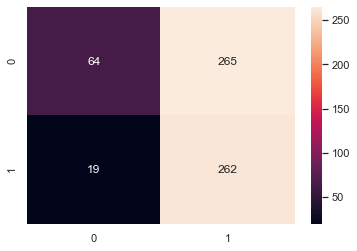

0.4 

Accuracy Score 0.5787
F1 Score 0.6088 

Confusion Matrix


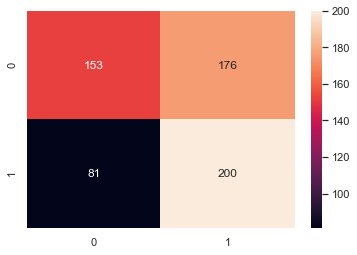

0.5 

Accuracy Score 0.6328
F1 Score 0.5234 

Confusion Matrix


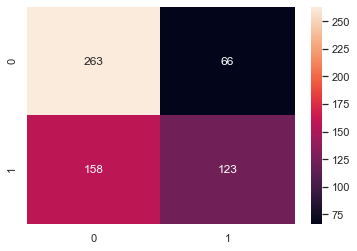

0.6 

Accuracy Score 0.6213
F1 Score 0.446 

Confusion Matrix


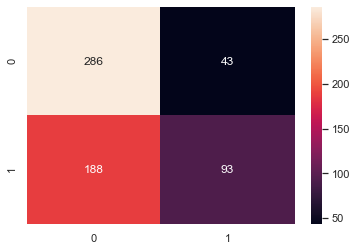

0.7 

Accuracy Score 0.5869
F1 Score 0.2455 

Confusion Matrix


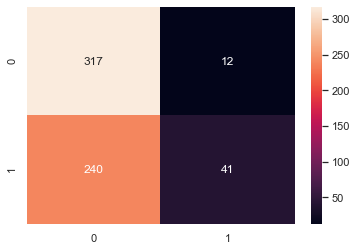

0.8 

Accuracy Score 0.541
F1 Score 0.0071 

Confusion Matrix


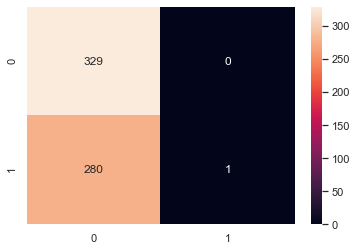

0.9 

Accuracy Score 0.5393
F1 Score 0.0 

Confusion Matrix


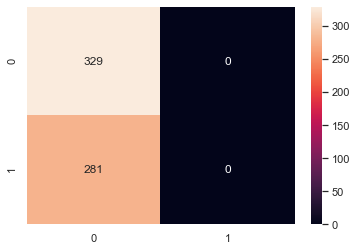

In [149]:
for j in np.arange(0.1,1,0.1):
    custom_prob = j #defining the cut-off value of our choice
    custom_cutoff_data=[] #defining an empty list
    for i in range(0,len(Y_train)): #defining a loop for the length of the test data
        if np.array(pred_prob_train[:,1])[i] > custom_prob: #issuing a condition for our probability values to be 
            #greater than the custom cutoff value
            a=1 #if the probability values are greater than the custom cutoff then the value should be 1
        else:
            a=0 #if the probability values are less than the custom cutoff then the value should be 0
        custom_cutoff_data.append(a) #adding either 1 or 0 based on the condition to the end of the list defined by us
    print(round(j,3),'\n')
    print('Accuracy Score',round(metrics.accuracy_score(Y_train,custom_cutoff_data),4))
    print('F1 Score',round(metrics.f1_score(Y_train,custom_cutoff_data),4),'\n')
    plt.figure(figsize=(6,4))
    print('Confusion Matrix')
    sns.heatmap(metrics.confusion_matrix(Y_train,custom_cutoff_data),annot=True,fmt='.4g'),'\n\n'
    plt.show();

### AUC and ROC Curve

AUC for the Training Data: 0.661
AUC for the Test Data: 0.675


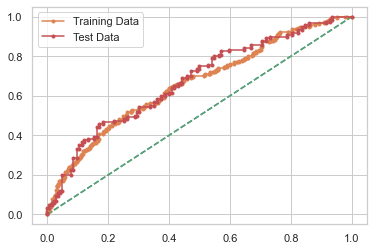

In [150]:
# AUC and ROC for the training data

# calculate AUC
lda_train_auc = metrics.roc_auc_score(Y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % lda_train_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
lda_test_auc = metrics.roc_auc_score(Y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % lda_test_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [151]:
lda_metrics=classification_report(Y_train, pred_class_train,output_dict=True)
df=pd.DataFrame(lda_metrics).transpose()
lda_train_f1=round(df.loc["1"][2],2)
lda_train_recall=round(df.loc["1"][1],2)
lda_train_precision=round(df.loc["1"][0],2)
print ('lda_train_precision ',lda_train_precision)
print ('lda_train_recall ',lda_train_recall)
print ('lda_train_f1 ',lr_train_f1)

lda_train_precision  0.65
lda_train_recall  0.44
lda_train_f1  0.53


In [152]:
lda_metrics=classification_report(Y_test, pred_class_test,output_dict=True)
df=pd.DataFrame(lda_metrics).transpose()
lda_test_f1=round(df.loc["1"][2],2)
lda_test_recall=round(df.loc["1"][1],2)
lda_test_precision=round(df.loc["1"][0],2)
print ('lda_test_precision ',lda_test_precision)
print ('lda_test_recall ',lda_test_recall)
print ('lda_test_f1 ',lda_test_f1)

lda_test_precision  0.69
lda_test_recall  0.45
lda_test_f1  0.55


In [153]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'LR Train':[lr_train_acc,lr_train_auc,lr_train_recall,lr_train_precision,lr_train_f1],
        'LR Test':[lr_test_acc,lr_test_auc,lr_test_recall,lr_test_precision,lr_test_f1],
       'LDA Train':[lda_train_acc,lda_train_auc,lda_train_recall,lda_train_precision,lda_train_f1],
        'LDA Test':[lda_test_acc,lda_test_auc,lda_test_recall,lda_test_precision,lda_test_f1],},index=index)
round(data,2)

,LR Train,LR Test,LDA Train,LDA Test
Accuracy,0.63,0.66,0.63,0.66
AUC,0.66,0.67,0.66,0.68
Recall,0.45,0.46,0.44,0.45
Precision,0.65,0.70,0.65,0.69
F1 Score,0.53,0.55,0.52,0.55


### Question 2.4 Inference: Basis on these predictions, what are the insights and recommendations.
#### Please explain and summarise the various steps performed in this project. There should be proper business interpretation and actionable insights present.

We had a business problem where we need predict whether an employee would opt for a holiday package or not, for this problem we had done predictions both logistic regression and linear discriminant analysis. Since both results are same.

The EDA analysis clearly indicates certain criteria where we could find people age above 50 are not interested much in holiday packages.

So, we found aged people are not opting for holiday packages.

People ranging from the age 30 to 50 generally opt for holiday packages.

Employee age over 50 to 60 have seems to be not taking the holiday package, 
whereas in the age 30 to 50 and salary less than 50000 people have opted more for holiday package.

The important factors deciding the predictions are salary, age and educ.

Recommendations :

1. To improve holiday packages over the age above 50 we can provide religious destination places.
2. For people earning more than 150000 we can provide vacation holiday packages.
3. For employee having more than number of older children we can provide packages in holiday vacation places.